<a href="https://colab.research.google.com/github/Dtenisha/Naive-Bayes-Classification/blob/main/naive_bayes_classification_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ML_datasets/advertising.csv')

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Greece                                                 8
Cyprus                                                 8
Liberia                                                8
                                                      ..
British Indian Ocean Territory (Chagos Archipelago)    1
Marshall Islands                                       1
Mozambique                                             1
Aruba                                                  1
Slovenia                                               1
Name: Country, Length: 237, dtype: int64

In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
data.drop(['Ad Topic Line','City','Country','Timestamp'],axis = 1,inplace = True)

In [8]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [9]:
X = data.iloc[:,0:4].values
Y = data['Clicked on Ad'].values

In [10]:
print(X)

[[6.895000e+01 3.500000e+01 6.183390e+04 2.560900e+02]
 [8.023000e+01 3.100000e+01 6.844185e+04 1.937700e+02]
 [6.947000e+01 2.600000e+01 5.978594e+04 2.365000e+02]
 ...
 [5.163000e+01 5.100000e+01 4.241572e+04 1.203700e+02]
 [5.555000e+01 1.900000e+01 4.192079e+04 1.879500e+02]
 [4.501000e+01 2.600000e+01 2.987580e+04 1.783500e+02]]


In [11]:
 print(Y)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 1 0 

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 1/3,random_state = 0)

In [13]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('Y_train shape:',Y_train.shape)
print('Y_test shape:',X_test.shape)

X_train shape: (666, 4)
X_test shape: (334, 4)
Y_train shape: (666,)
Y_test shape: (334, 4)


In [14]:
print(Y_test)

[0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1
 0]


In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [16]:
#naive bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
#predicting
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1
 0]


In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
ac = accuracy_score(Y_test,y_pred)

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

#accuracy score of the model
print('Accuracy score :',accuracy_score(Y_test,y_pred))

[[173   8]
 [  4 149]]
Accuracy score : 0.9640718562874252


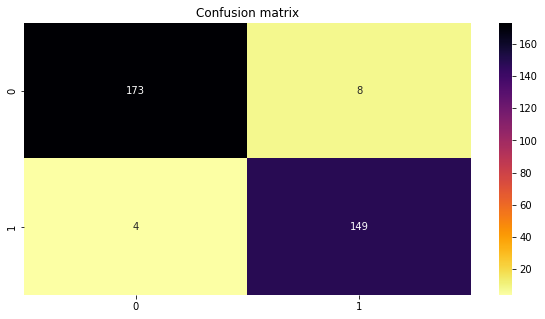

In [20]:
plt.figure(figsize=(10,5))
plt.title('Confusion matrix')
sns.heatmap(cm,annot=True,fmt='d',cmap='inferno_r')